In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2023-01-28 09:27:22.642961: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images, labels = C.Helper.load(DATAPATH)

In [4]:
images, labels = C.Helper.shuffle(images, labels)

In [5]:
images, labels = C.Helper.normalize(images, labels)

In [6]:
X_train, X_val, y_train, y_val = C.Helper.split(images, labels, val_size=0.2)

In [7]:
train_gen = C.Helper.augment(X_train, y_train)

In [ ]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_val, y_val, epochs=1000)

/home/daniel.haehn/miniconda3/envs/CTF25/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-01-28 09:29:02.226133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-28 09:29:02.245221: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/1000


2023-01-28 09:29:03.385184: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-28 09:29:04.000380: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-01-28 09:29:04.644710: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-01-28 09:29:04.644736: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-01-28 09:29:04.644807: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-28 09:29:04.685439: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-28 09:29:05.393419: I tensorflow/stream_exec

12/12 [==============================] - 21s 1s/step - loss: 0.7502 - iou: 0.0010 - iou_thresholded: 0.0071 - val_loss: 0.1314 - val_iou: 1.1572e-04 - val_iou_thresholded: 2.1726e-04
Epoch 2/1000
12/12 [==============================] - 2s 160ms/step - loss: 0.0289 - iou: 0.0031 - iou_thresholded: 0.0136 - val_loss: 0.0106 - val_iou: 5.1838e-04 - val_iou_thresholded: 0.0014
Epoch 3/1000
12/12 [==============================] - 2s 159ms/step - loss: 0.0081 - iou: 0.0080 - iou_thresholded: 0.0147 - val_loss: 0.0088 - val_iou: 3.9141e-04 - val_iou_thresholded: 0.0014
Epoch 4/1000
12/12 [==============================] - 2s 159ms/step - loss: 0.0057 - iou: 0.0060 - iou_thresholded: 0.0145 - val_loss: 0.0040 - val_iou: 0.0011 - val_iou_thresholded: 0.0014
Epoch 5/1000
12/12 [==============================] - 2s 160ms/step - loss: 0.0060 - iou: 0.0032 - iou_thresholded: 0.0105 - val_loss: 0.0037 - val_iou: 4.6608e-04 - val_iou_thresholded: 0.0014
Epoch 6/1000
12/12 [=========================

Epoch 44/1000
12/12 [==============================] - 2s 160ms/step - loss: 0.0025 - iou: 0.0049 - iou_thresholded: 0.0068 - val_loss: 0.0018 - val_iou: 0.0020 - val_iou_thresholded: 0.0014
Epoch 45/1000
12/12 [==============================] - 2s 161ms/step - loss: 0.0016 - iou: 0.0071 - iou_thresholded: 0.0167 - val_loss: 0.0020 - val_iou: 0.0017 - val_iou_thresholded: 0.0014
Epoch 46/1000
12/12 [==============================] - 2s 159ms/step - loss: 0.0020 - iou: 0.0054 - iou_thresholded: 0.0091 - val_loss: 0.0018 - val_iou: 0.0021 - val_iou_thresholded: 0.0014
Epoch 47/1000
12/12 [==============================] - 2s 161ms/step - loss: 0.0017 - iou: 0.0081 - iou_thresholded: 0.0138 - val_loss: 0.0018 - val_iou: 0.0020 - val_iou_thresholded: 0.0014
Epoch 48/1000
12/12 [==============================] - 2s 159ms/step - loss: 0.0021 - iou: 0.0095 - iou_thresholded: 0.0280 - val_loss: 0.0021 - val_iou: 0.0024 - val_iou_thresholded: 0.0014
Epoch 49/1000
12/12 [========================

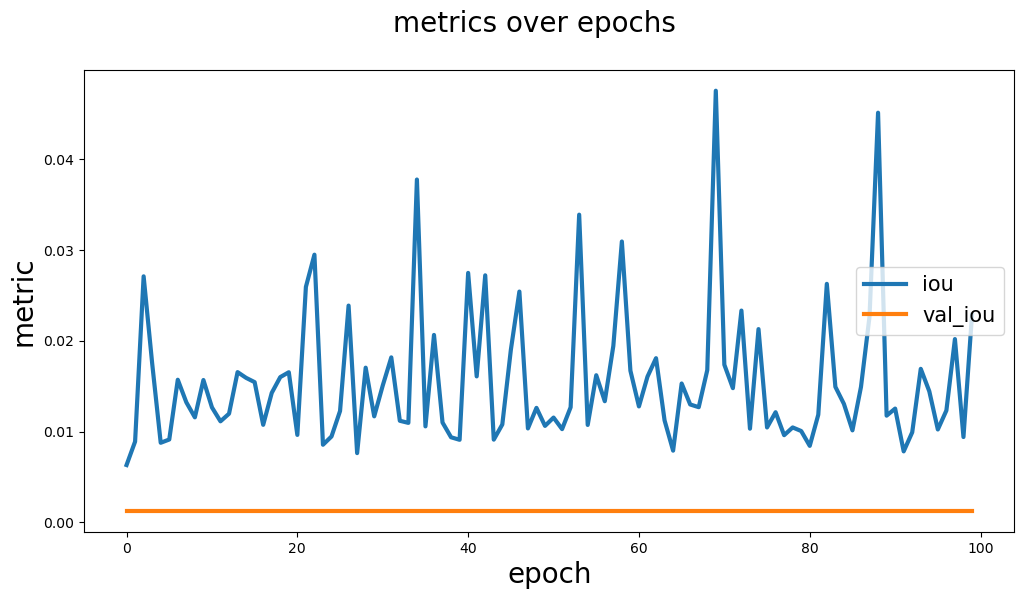

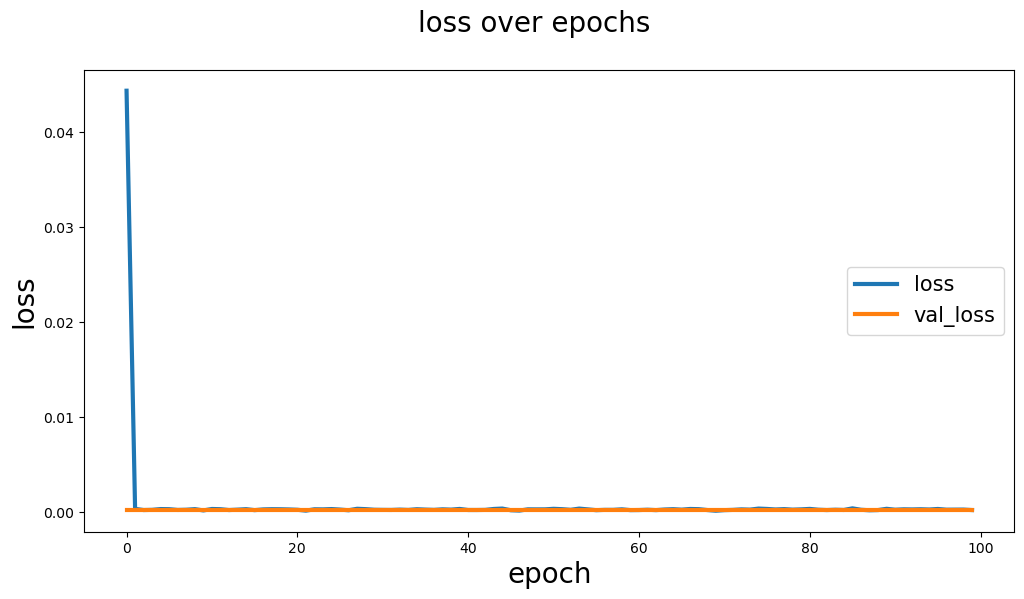

In [11]:
from keras_unet.utils import plot_segm_history
plot_segm_history(history)

In [24]:
y_pred = model.predict(X_test)

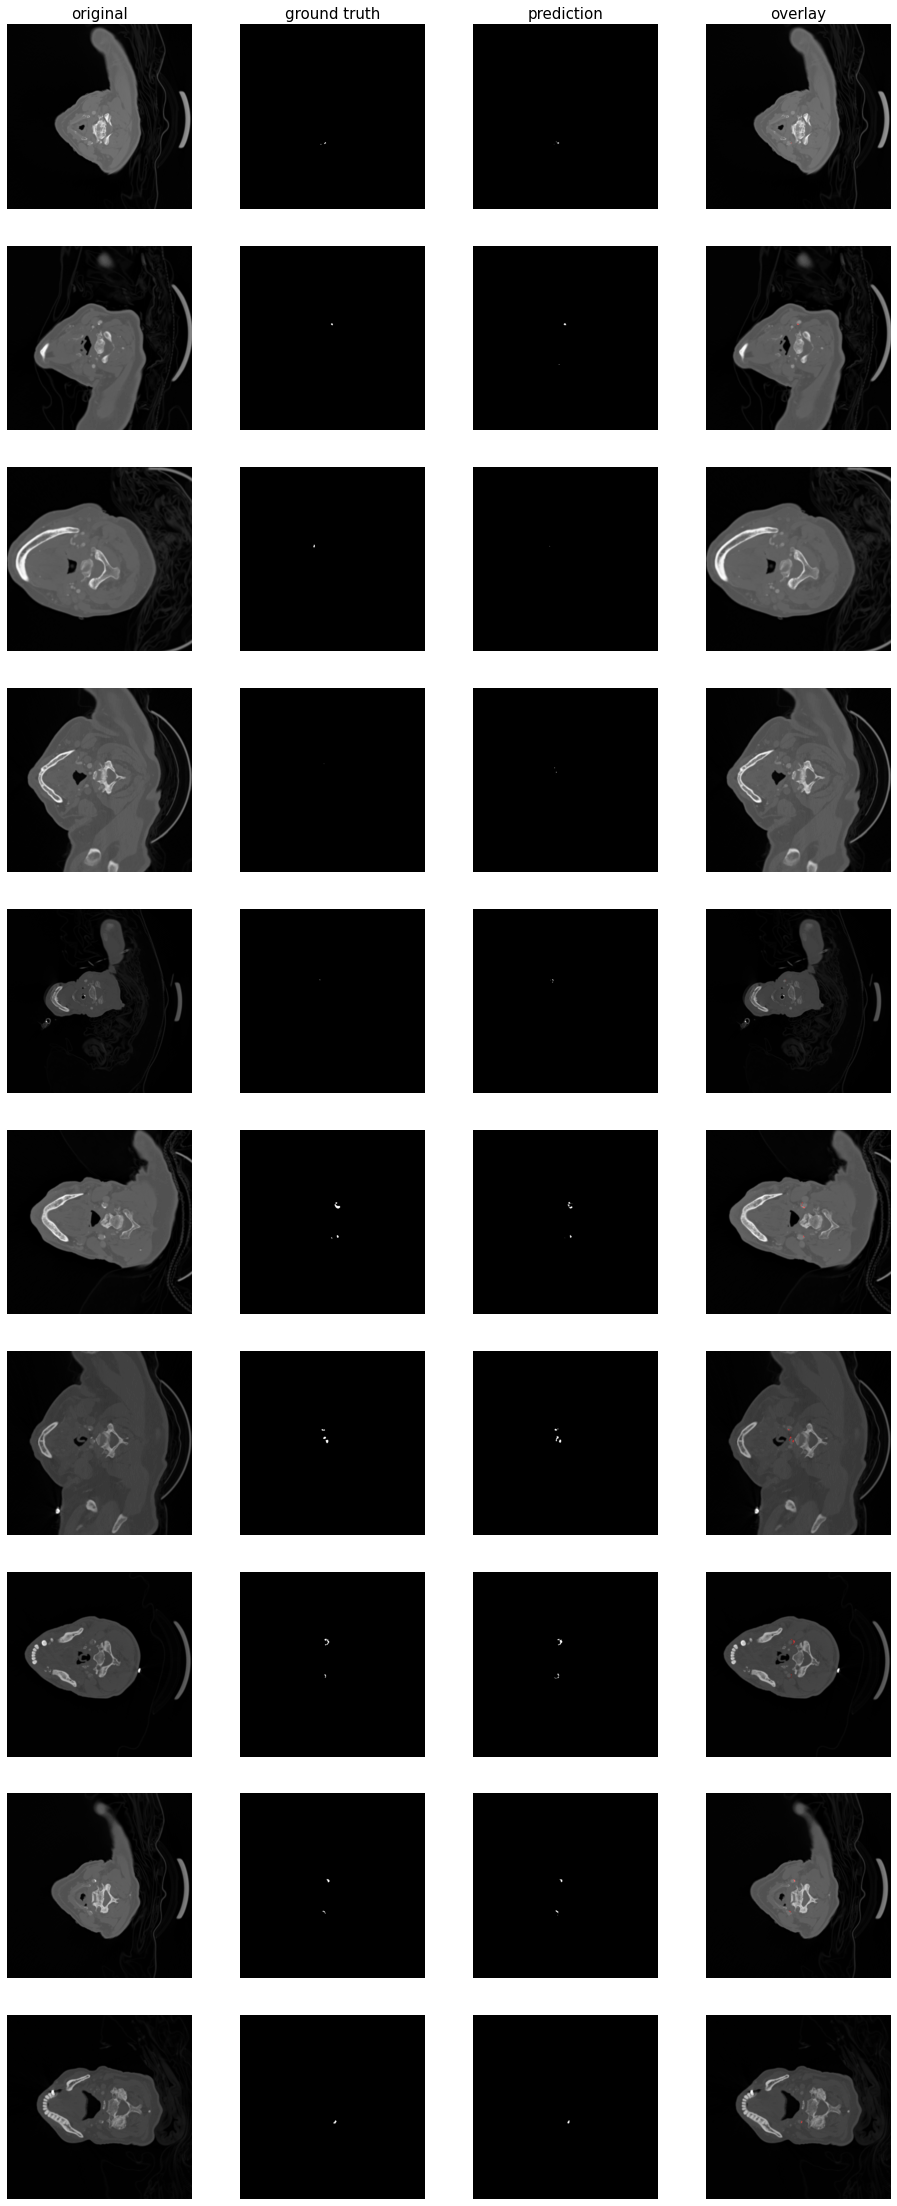

In [25]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_test, mask_imgs=y_test, pred_imgs=y_pred, nm_img_to_plot=10)

In [26]:
loss, iou, iou_thresholded = model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 162ms/step - loss: 0.0011 - iou: 0.4864 - iou_thresholded: 0.4902


In [27]:
import mahotas as mh

In [28]:
image = X_test[0]

In [29]:
image.shape

(512, 512, 1)

In [30]:
label = y_test[0]

In [31]:
pred = y_pred[0]

In [32]:
bbox = mh.bbox(label)
incr=30

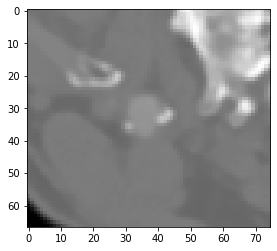

In [33]:
imshow(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:],cmap='gray')

In [34]:
X_test_c = []
y_test_c = []
y_pred_c = []

for i,z in enumerate(X_test):
    
    image = X_test[i]
    label = y_test[i]
    pred = y_pred[i]
    
    bbox = mh.bbox(label)
    incr=30
    X_test_c.append(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_test_c.append(label[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_pred_c.append(pred[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])


In [35]:
maxX = 0
maxY = 0

for i,z in enumerate(X_test_c):
    
    maxX = max(z.shape[1], maxX)
    maxY = max(z.shape[0], maxY)
    
X_test_c_np = np.zeros((len(X_test_c), maxY, maxX,1), dtype=X_test.dtype)
y_test_c_np = np.zeros((len(y_test_c), maxY, maxX,1), dtype=y_test.dtype)
y_pred_c_np = np.zeros((len(y_pred_c), maxY, maxX,1), dtype=y_pred.dtype)

for i,z in enumerate(X_test_c):
    
    image = X_test_c[i]
    label = y_test_c[i]
    pred = y_pred_c[i]
    
    X_test_c_np[i][0:image.shape[0], 0:image.shape[1],:] = image
    y_test_c_np[i][0:label.shape[0], 0:label.shape[1],:] = label
    y_pred_c_np[i][0:pred.shape[0], 0:pred.shape[1],:] = pred
    

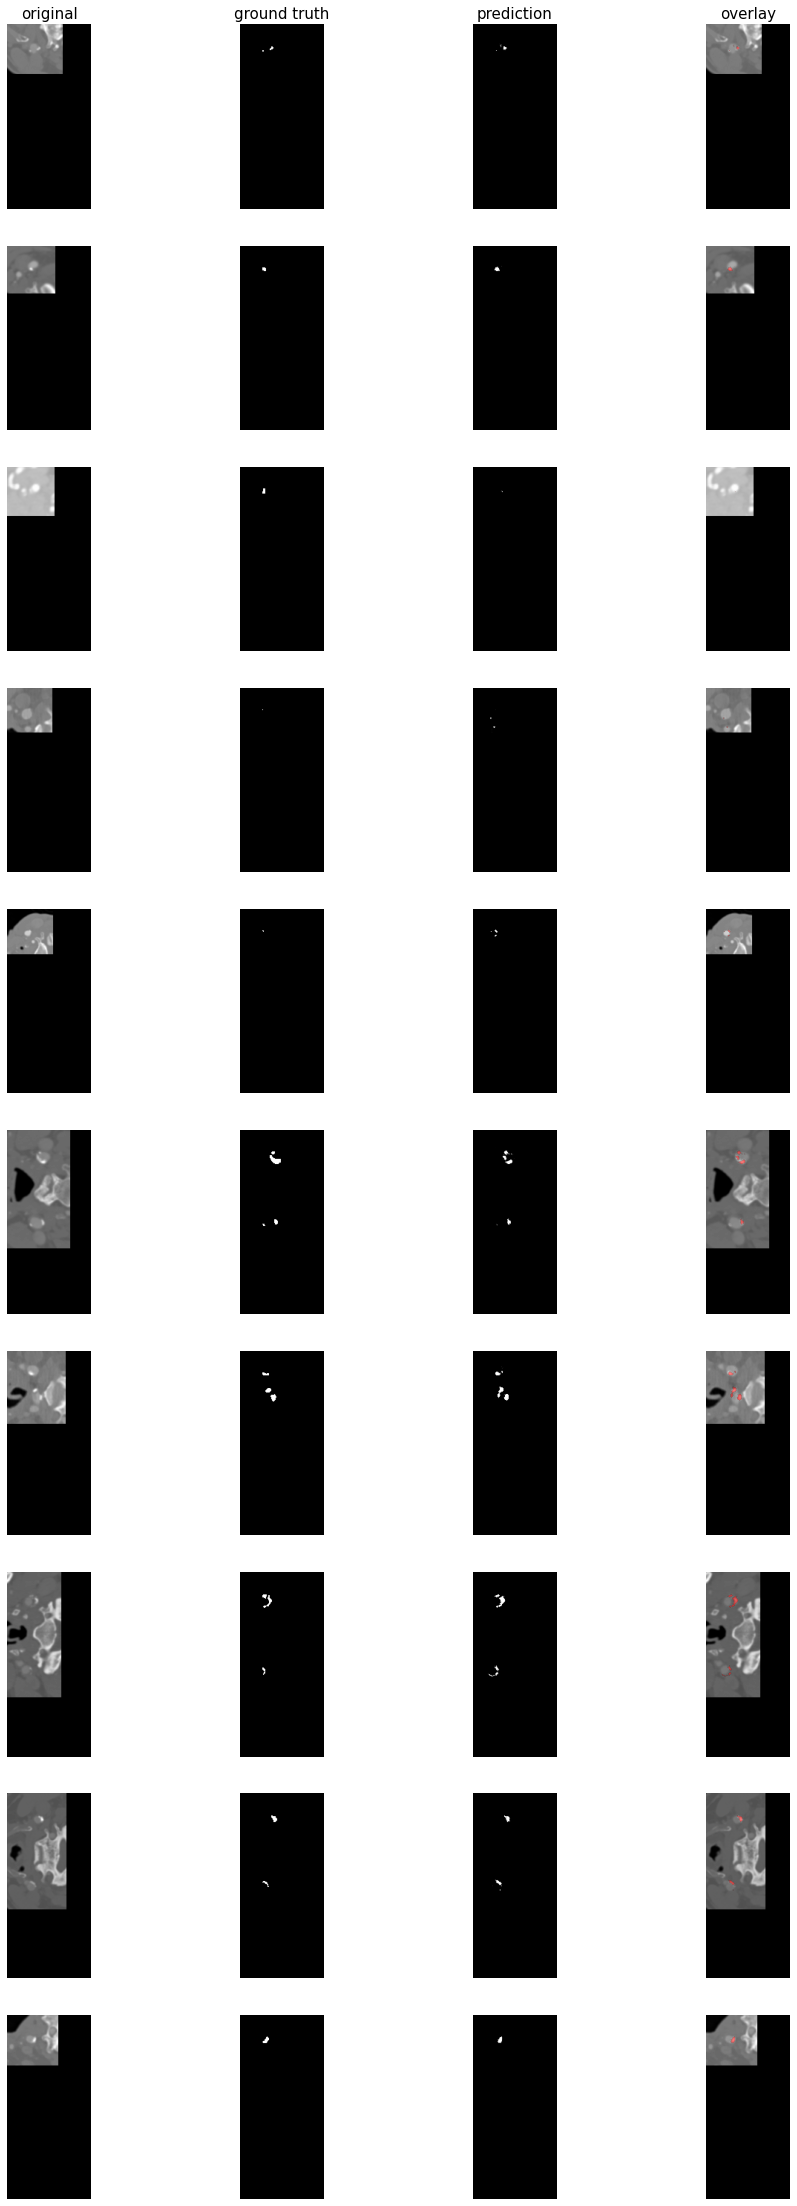

In [36]:
plot_imgs(org_imgs=X_test_c_np, mask_imgs=y_test_c_np, pred_imgs=y_pred_c_np)